<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from pandas_datareader import data, wb
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() # Allow matplotlib have access to timestamp 
import matplotlib.ticker as mplticker

In [83]:
import pandas as pd

df = pd.read_excel('https://www.philadelphiafed.org/-/media/research-and-data/real-time-center/partisan-conflict-index/pci-index-release.xlsx?la=en')

In [84]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + df['Month'], format='%Y%B').dt.strftime('%Y-%m-%d')

In [85]:
df.drop(['Year', 'Month'], axis=1, inplace = True)

In [86]:
df.set_index('Date', inplace = True)

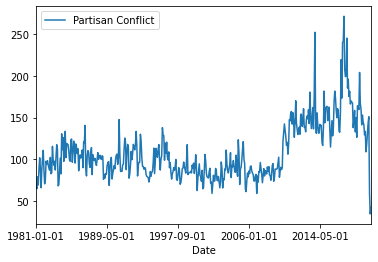

In [87]:
df.plot()

In [88]:
start = dt.datetime(1981, 1, 1)
end = dt.datetime.today()
RealGPDI = pdr.data.DataReader('GPDIC1', 'fred', start, end)

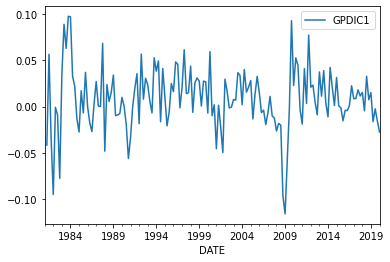

In [63]:
(RealGPDI.pct_change()).plot()

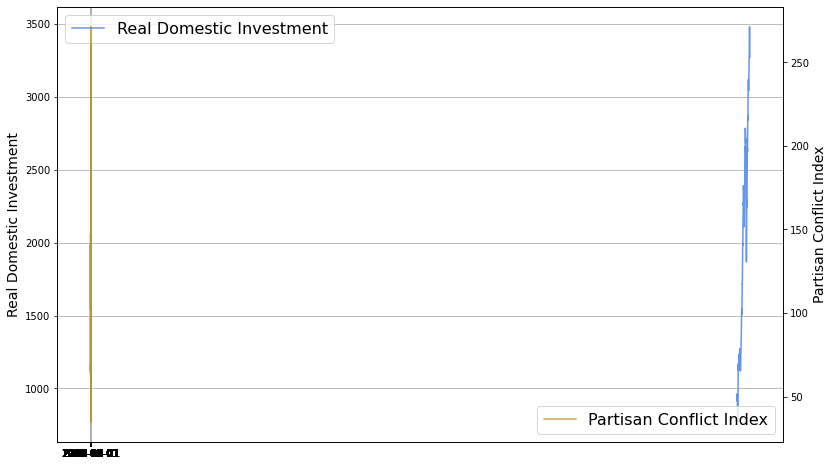

In [90]:
fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(RealGPDI, color = 'CornflowerBlue', alpha = 1, label = 'Real Domestic Investment')
ax.set_ylabel('Real Domestic Investment', size = 14)

ax_RHS = ax.twinx() # share the same x-axis
ax_RHS.plot(df['Partisan Conflict'], color = 'DarkGoldenRod', alpha = .7, label = 'Partisan Conflict Index')
ax_RHS.set_ylabel('Partisan Conflict Index', size = 14)

ax.legend(fontsize = 16)
ax_RHS.legend(fontsize = 16, loc = 'lower right')
ax.grid()
plt.show()